In [109]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [71]:
data = pd.read_csv('/Users/antoinebertin/Documents/jedha/full_stack/projects_full_stack/crc/conversion_data_train.csv')
data.shape

(284580, 6)

# ✅ init

In [72]:
data.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [74]:
data.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

# 📊 plot

In [75]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


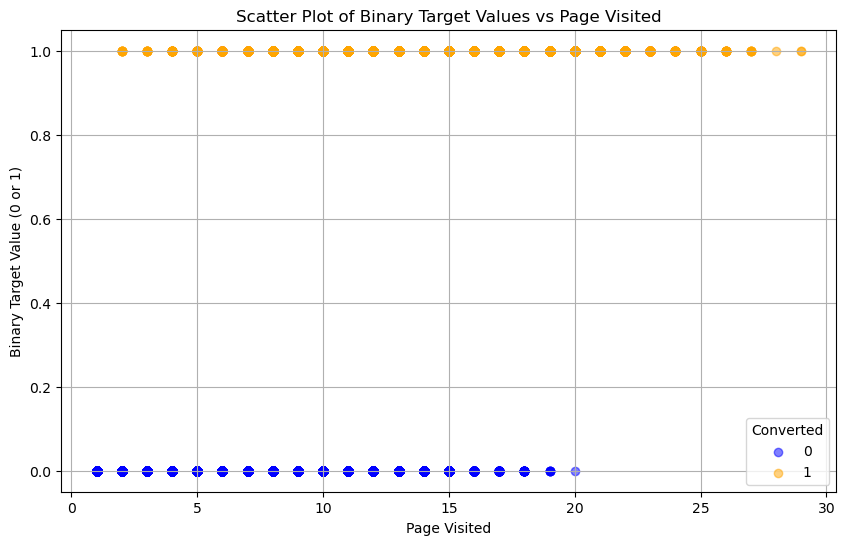

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(data['total_pages_visited'][data['converted'] == 0], data['converted'][data['converted'] == 0], alpha=0.5, label='0', c='blue')
plt.scatter(data['total_pages_visited'][data['converted'] == 1], data['converted'][data['converted'] == 1], alpha=0.5, label='1', c='orange')
plt.title('Scatter Plot of Binary Target Values vs Page Visited')
plt.xlabel('Page Visited')
plt.ylabel('Binary Target Value (0 or 1)')
plt.legend(title='Converted')
plt.grid(True)
plt.show()

/Users/antoinebertin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


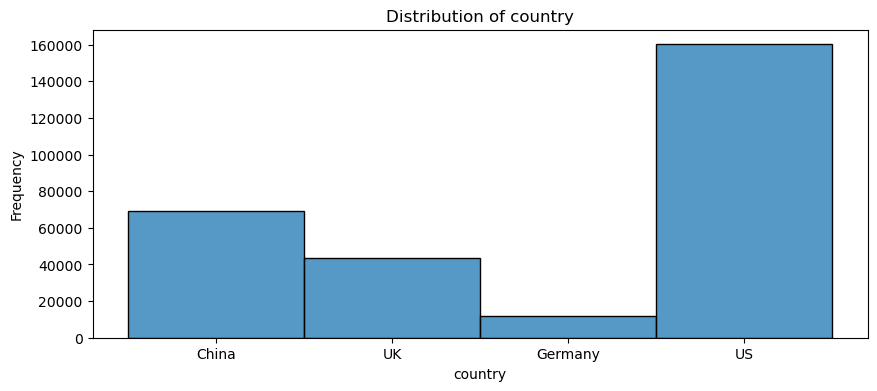

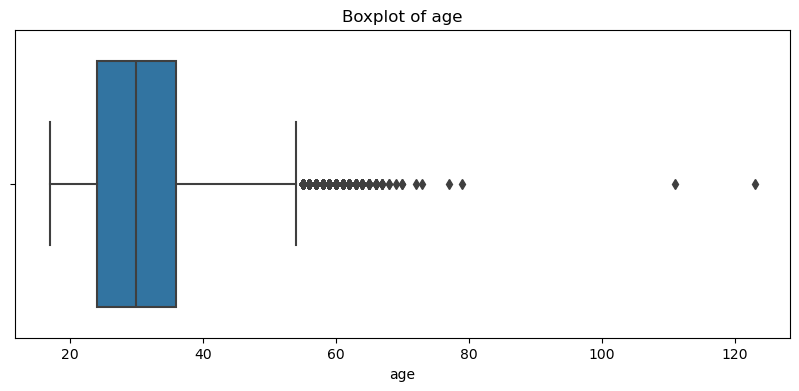

/Users/antoinebertin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


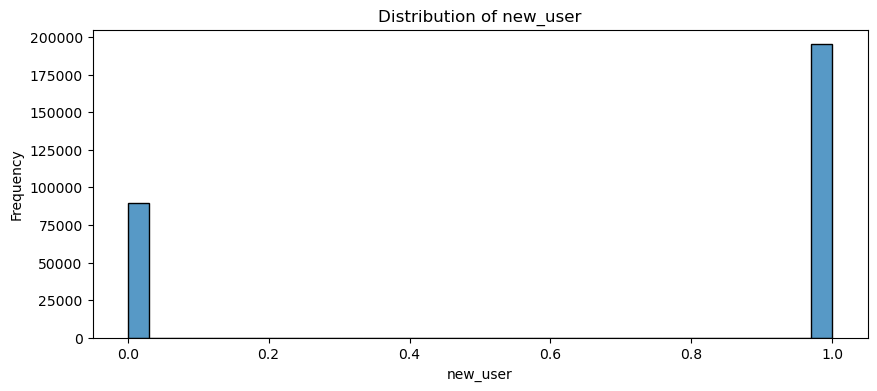

/Users/antoinebertin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


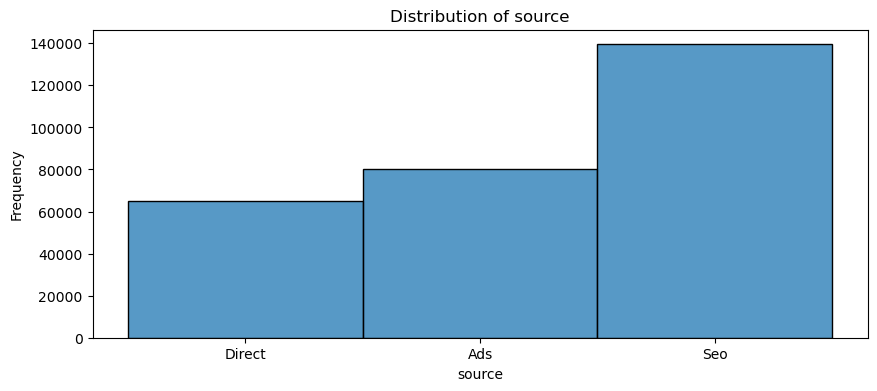

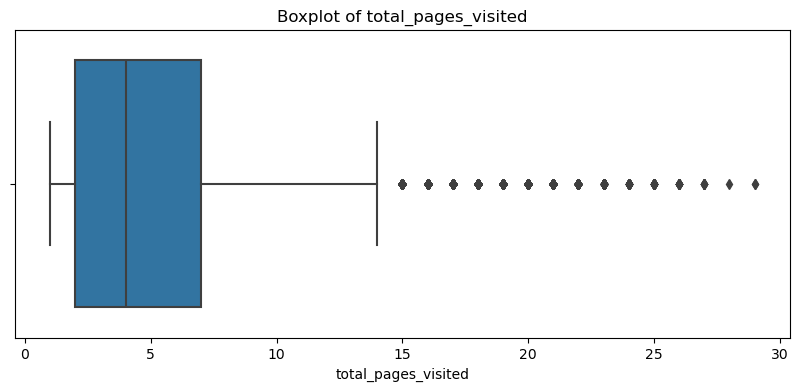

/Users/antoinebertin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


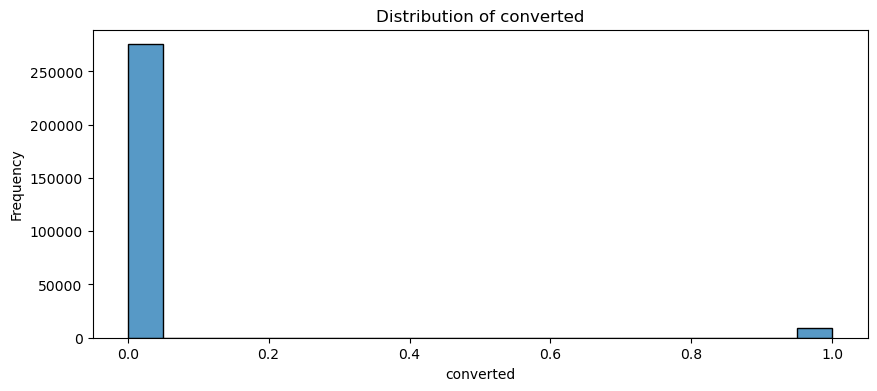

In [77]:
plt.figure(figsize=(10, 4))
sns.histplot(data['country'])
plt.title(f'Distribution of country')
plt.xlabel('country')
plt.ylabel('Frequency')
plt.show()
    
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['age'])
plt.title(f'Boxplot of age')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(data['new_user'])  # Kernel Density Estimate (KDE) for smooth distribution
plt.title(f'Distribution of new_user')
plt.xlabel('new_user')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(data['source'])  # Kernel Density Estimate (KDE) for smooth distribution
plt.title(f'Distribution of source')
plt.xlabel('source')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=data['total_pages_visited'])
plt.title(f'Boxplot of total_pages_visited')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(data['converted'])  # Kernel Density Estimate (KDE) for smooth distribution
plt.title(f'Distribution of converted')
plt.xlabel('converted')
plt.ylabel('Frequency')
plt.show()

I have found no correlation with 'age' and target so I am fine with removing outliers but regarding 'total_pages_visited' there is an interesting correlation with y so I prefer to keep the outliers as the more you visit a page the more 'it seems' that you convert.

# ✅ outliers found in 'age'  - proceesed at 3 STD

In [78]:
age_mean = data['age'].mean()
age_std = data['age'].std() 

In [79]:
high = age_mean + 3 * age_std
low =   age_mean - 3 * age_std
high, low

(55.36457159268994, 5.763835182206396)

In [80]:
# Calculate the percentage of users above age 55
above_55 = data[data['age'] > 55].shape[0]
total_users = data.shape[0]
percentage_above_55 = (above_55 / total_users) * 100
print(f"Percentage of users above age 55: {percentage_above_55:.2f}%")

Percentage of users above age 55: 0.36%


In [81]:
data[data['age'] > 55].count()

country                1017
age                    1017
new_user               1017
source                 1017
total_pages_visited    1017
converted              1017
dtype: int64

<Axes: xlabel='age'>

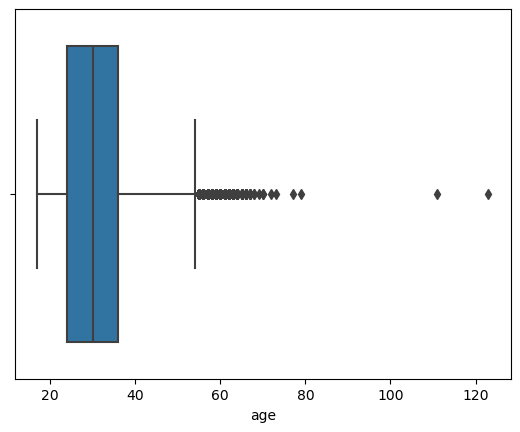

In [82]:
sns.boxplot(x=data['age'])

In [83]:
age_cleaned_df = data[data['age'] < 55]

<Axes: xlabel='age'>

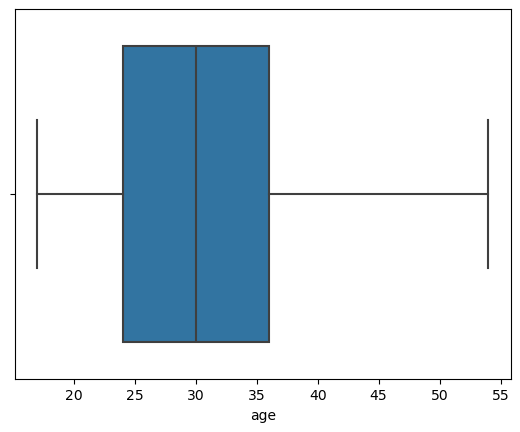

In [84]:
sns.boxplot(x=age_cleaned_df['age'])

# ✅ No correlated features found & 'total_pages_visited' seems important

In [85]:
age_cleaned_df.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,283211,283211.000000,283211.000000,283211,283211.000000,283211.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,159323,NaN,NaN,138814,NaN,NaN
mean,NaN,30.432766,0.685390,NaN,4.874122,0.032379
std,NaN,8.063141,0.464361,NaN,3.343719,0.177004
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [86]:
categorical_features_df = age_cleaned_df[['country', 'source']]

In [87]:
cat_encoder = OneHotEncoder(sparse_output=False) 
#cat_encoder = OneHotEncoder() 
# sparse True (default) return sparse matrix / False return dense Array

In [88]:
cat_encoded = cat_encoder.fit_transform(categorical_features_df)

In [89]:
cat_encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [90]:
cat_encoder.get_feature_names_out()

array(['country_China', 'country_Germany', 'country_UK', 'country_US',
       'source_Ads', 'source_Direct', 'source_Seo'], dtype=object)

In [91]:
encoded_features_df = pd.DataFrame(cat_encoded, columns=cat_encoder.get_feature_names_out())

In [92]:
encoded_features_df

,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
283206,0.0,0.0,0.0,1.0,1.0,0.0,0.0
283207,0.0,0.0,0.0,1.0,0.0,0.0,1.0
283208,0.0,0.0,0.0,1.0,0.0,0.0,1.0
283209,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [93]:
# Concatenate the original DataFrame (minus the categorical columns) with the new encoded DataFrame
df_numerical = age_cleaned_df.drop(['country', 'source'], axis=1)
age_cleaned_df_cat_encoded = pd.concat([df_numerical, encoded_features_df], axis=1)

In [94]:
encoded_features_df

,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
283206,0.0,0.0,0.0,1.0,1.0,0.0,0.0
283207,0.0,0.0,0.0,1.0,0.0,0.0,1.0
283208,0.0,0.0,0.0,1.0,0.0,0.0,1.0
283209,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [95]:
df_numerical

,age,new_user,total_pages_visited,converted
0,22,1,2,0
1,21,1,3,0
2,20,0,14,1
3,23,1,3,0
4,28,1,3,0
...,...,...,...,...
284575,36,1,1,0
284576,31,1,2,0
284577,41,1,5,0
284578,31,1,4,0


In [96]:
age_cleaned_df_cat_encoded

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,22.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,20.0,0.0,14.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,23.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,28.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
282551,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0
282556,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0
282763,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0
282840,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [97]:
# Calculate the correlation matrix
corr_matrix = age_cleaned_df_cat_encoded.corr()
corr_matrix['converted'].sort_values(ascending=False)

#! I now that 'total_pages_visited' will ne an important features

converted              1.000000
total_pages_visited    0.529968
country_China          0.001801
country_UK             0.001685
source_Seo             0.001058
source_Ads             0.000232
country_Germany        0.000102
source_Direct         -0.001507
country_US            -0.002822
age                   -0.088752
new_user              -0.152419
Name: converted, dtype: float64

In [98]:
corr_matrix # are there any features correlated with each other?

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
age,1.000000,0.011728,-0.045908,-0.088752,-0.000624,-0.000289,0.000539,0.000263,-0.000386,-0.002006,0.002032
new_user,0.011728,1.000000,-0.083283,-0.152419,-0.004227,0.001183,-0.002984,0.005348,-0.000613,0.003000,-0.001969
total_pages_visited,-0.045908,-0.083283,1.000000,0.529968,0.000004,0.000803,0.000948,-0.001013,0.000722,-0.001295,0.000438
converted,-0.088752,-0.152419,0.529968,1.000000,0.001801,0.000102,0.001685,-0.002822,0.000232,-0.001507,0.001058
country_China,-0.000624,-0.004227,0.000004,0.001801,1.000000,-0.117263,-0.241145,-0.642379,0.001295,-0.001419,0.000027
country_Germany,-0.000289,0.001183,0.000803,0.000102,-0.117263,1.000000,-0.088127,-0.234758,0.003649,-0.004741,0.000701
country_UK,0.000539,-0.002984,0.000948,0.001685,-0.241145,-0.088127,1.000000,-0.482765,-0.002333,0.000869,0.001368
country_US,0.000263,0.005348,-0.001013,-0.002822,-0.642379,-0.234758,-0.482765,1.000000,-0.000885,0.002492,-0.001297
source_Ads,-0.000386,-0.000613,0.000722,0.000232,0.001295,0.003649,-0.002333,-0.000885,1.000000,-0.340541,-0.613277
source_Direct,-0.002006,0.003000,-0.001295,-0.001507,-0.001419,-0.004741,0.000869,0.002492,-0.340541,1.000000,-0.533811


In [99]:
# Define a threshold for identifying high correlations
threshold = 0.5
# Find features with correlation greater than the threshold
high_corr = [(i, j, corr_matrix.loc[i, j]) for i in corr_matrix.columns for j in corr_matrix.columns if (i != j) and (abs(corr_matrix.loc[i, j]) > threshold)]

# Print out the highly correlated feature pairs and their correlation coefficients
for feature1, feature2, corr in high_corr:
    print(f"{feature1} & {feature2} -> {corr:.2f}")


total_pages_visited & converted -> 0.53
converted & total_pages_visited -> 0.53
country_China & country_US -> -0.64
country_US & country_China -> -0.64
source_Ads & source_Seo -> -0.61
source_Direct & source_Seo -> -0.53
source_Seo & source_Ads -> -0.61
source_Seo & source_Direct -> -0.53


The oneHotEncoded features might have some corr but I ll ignore that for now, what I ll keep in mind is that'total_pages_visited' will ne an important features for prediction

# ⚙️ Strong imbalance data on y (and country) 

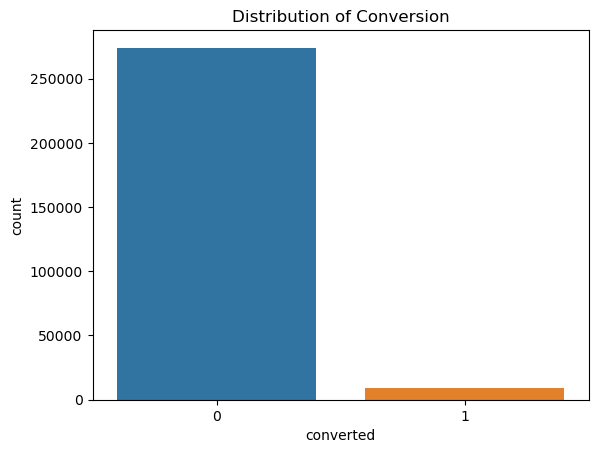

In [100]:
# Assuming 'df' is your DataFrame and 'converted' is the target variable
sns.countplot(x='converted', data=age_cleaned_df)
plt.title('Distribution of Conversion')
plt.show()

# ⚙️ outliers found in 'total_pages_visited'

In [107]:
age_cleaned_df['total_pages_visited']

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0
...,...,...,...,...,...,...
284575,US,36,1,Ads,1,0
284576,US,31,1,Seo,2,0
284577,US,41,1,Seo,5,0
284578,US,31,1,Direct,4,0


In [108]:
page_visited_mean = age_cleaned_df['total_pages_visited'].mean()
page_visited_std = age_cleaned_df['total_pages_visited'].std() 

In [110]:
high_page = page_visited_mean + 3 * page_visited_std
low_page =   page_visited_mean - 3 * page_visited_std
high_page, low_page

(14.905278007679524, -5.157033765753892)

In [112]:
# Calculate the percentage of page visited above age 14
above_14 = age_cleaned_df[age_cleaned_df['total_pages_visited'] > 14].shape[0]
total_visited = age_cleaned_df.shape[0]
percentage_above_14 = (above_14 / total_visited) * 100
print(f"Percentage of page visited above 14: {percentage_above_14:.2f}%")

Percentage of page visited above 14: 1.80%


In [113]:
age_cleaned_df[age_cleaned_df['total_pages_visited'] > 14].count()

country                5110
age                    5110
new_user               5110
source                 5110
total_pages_visited    5110
converted              5110
dtype: int64

<Axes: xlabel='total_pages_visited'>

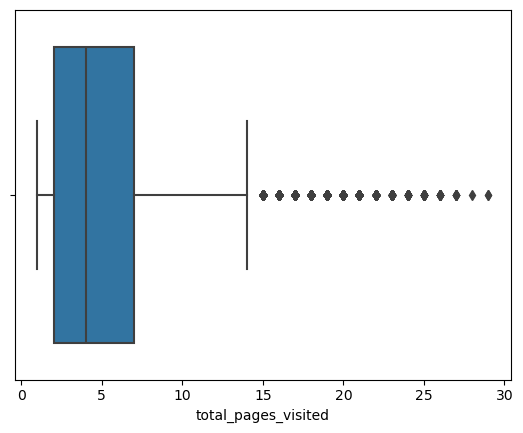

In [114]:
sns.boxplot(x=age_cleaned_df['total_pages_visited'])

In [121]:
mask = age_cleaned_df['total_pages_visited'] > 14
(age_cleaned_df[mask]['converted'] == 1).sum()

4578

In [122]:
(age_cleaned_df['converted'] == 1).sum()

9170

# 🔗 Save a df locally

In [101]:
age_cleaned_df.head() #train_v1.csv

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [102]:
# index=False so I dont have panda save indexes to csv
age_cleaned_df.to_csv('/Users/antoinebertin/Documents/jedha/full_stack/projects_full_stack/crc/train_v1.csv', index=False)